In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
sns.set()


In [15]:
df = pd.read_csv('../data/train/diamonds_train.csv',index_col=[0])
df.head()

,index_id,depth,table,x,y,z,price,carat,cut,color,clarity,city
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,62.4,58.0,6.83,6.79,4.25,4268,1.21,Premium,J,VS2,Dubai
1,41667f6e2629360aecaf00b20f8732e3310417ebd54b24...,61.6,58.0,6.40,6.35,3.93,3513,1.02,Premium,J,VS2,Dubai
2,01f8667f50d52677bea23231a74156e4f92360d7bc3db6...,62.3,58.0,5.86,5.80,3.63,1792,0.77,Premium,J,VS2,Dubai
3,c3867352aab641358faec75d733af012dbe2259a014ea8...,59.6,60.0,7.58,7.48,4.49,7553,1.51,Premium,J,VS2,Dubai
4,0da4b104c4d8589fcb96a03aa0787549a2631935b0f499...,60.2,62.0,5.40,5.33,3.23,1176,0.57,Premium,J,VS2,Dubai


In [16]:
df.drop(labels='index_id', axis=1, inplace= True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   depth    40455 non-null  float64
 1   table    40455 non-null  float64
 2   x        40455 non-null  float64
 3   y        40455 non-null  float64
 4   z        40455 non-null  float64
 5   price    40455 non-null  int64  
 6   carat    40455 non-null  float64
 7   cut      40455 non-null  object 
 8   color    40455 non-null  object 
 9   clarity  40455 non-null  object 
 10  city     40455 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 3.7+ MB


In [18]:
df.describe()

,depth,table,x,y,z,price,carat
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,61.752841,57.446133,5.729392,5.732819,3.537154,3928.444469,0.797706
std,1.431725,2.233535,1.124453,1.146650,0.697062,3992.416147,0.475544
min,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000,0.200000
25%,61.000000,56.000000,4.710000,4.720000,2.910000,945.000000,0.400000
50%,61.800000,57.000000,5.690000,5.710000,3.520000,2397.000000,0.700000
75%,62.500000,59.000000,6.540000,6.540000,4.035000,5331.000000,1.040000
max,79.000000,95.000000,10.230000,58.900000,8.060000,18823.000000,4.500000


/Users/ivan.repilado/miniconda3/envs/ironhack/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


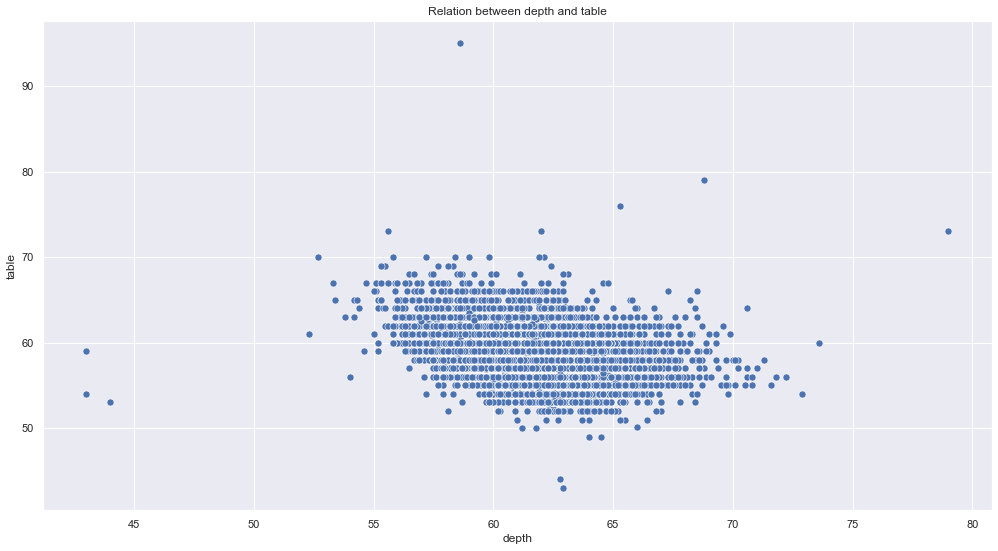

In [23]:
#Relation between depth and table
plt.figure(figsize=(17,9))
plt.title('Relation between depth and table')
sns.scatterplot(df['depth'],df['table'],s=50);

Seguramente podremos considerar como outliers los valores de depth<50 y los depth>75
Además, los table<50 y los table>75, que son los que salen de los valores normales.
De todas formas, lo miramos mas adelante como tratarlos.

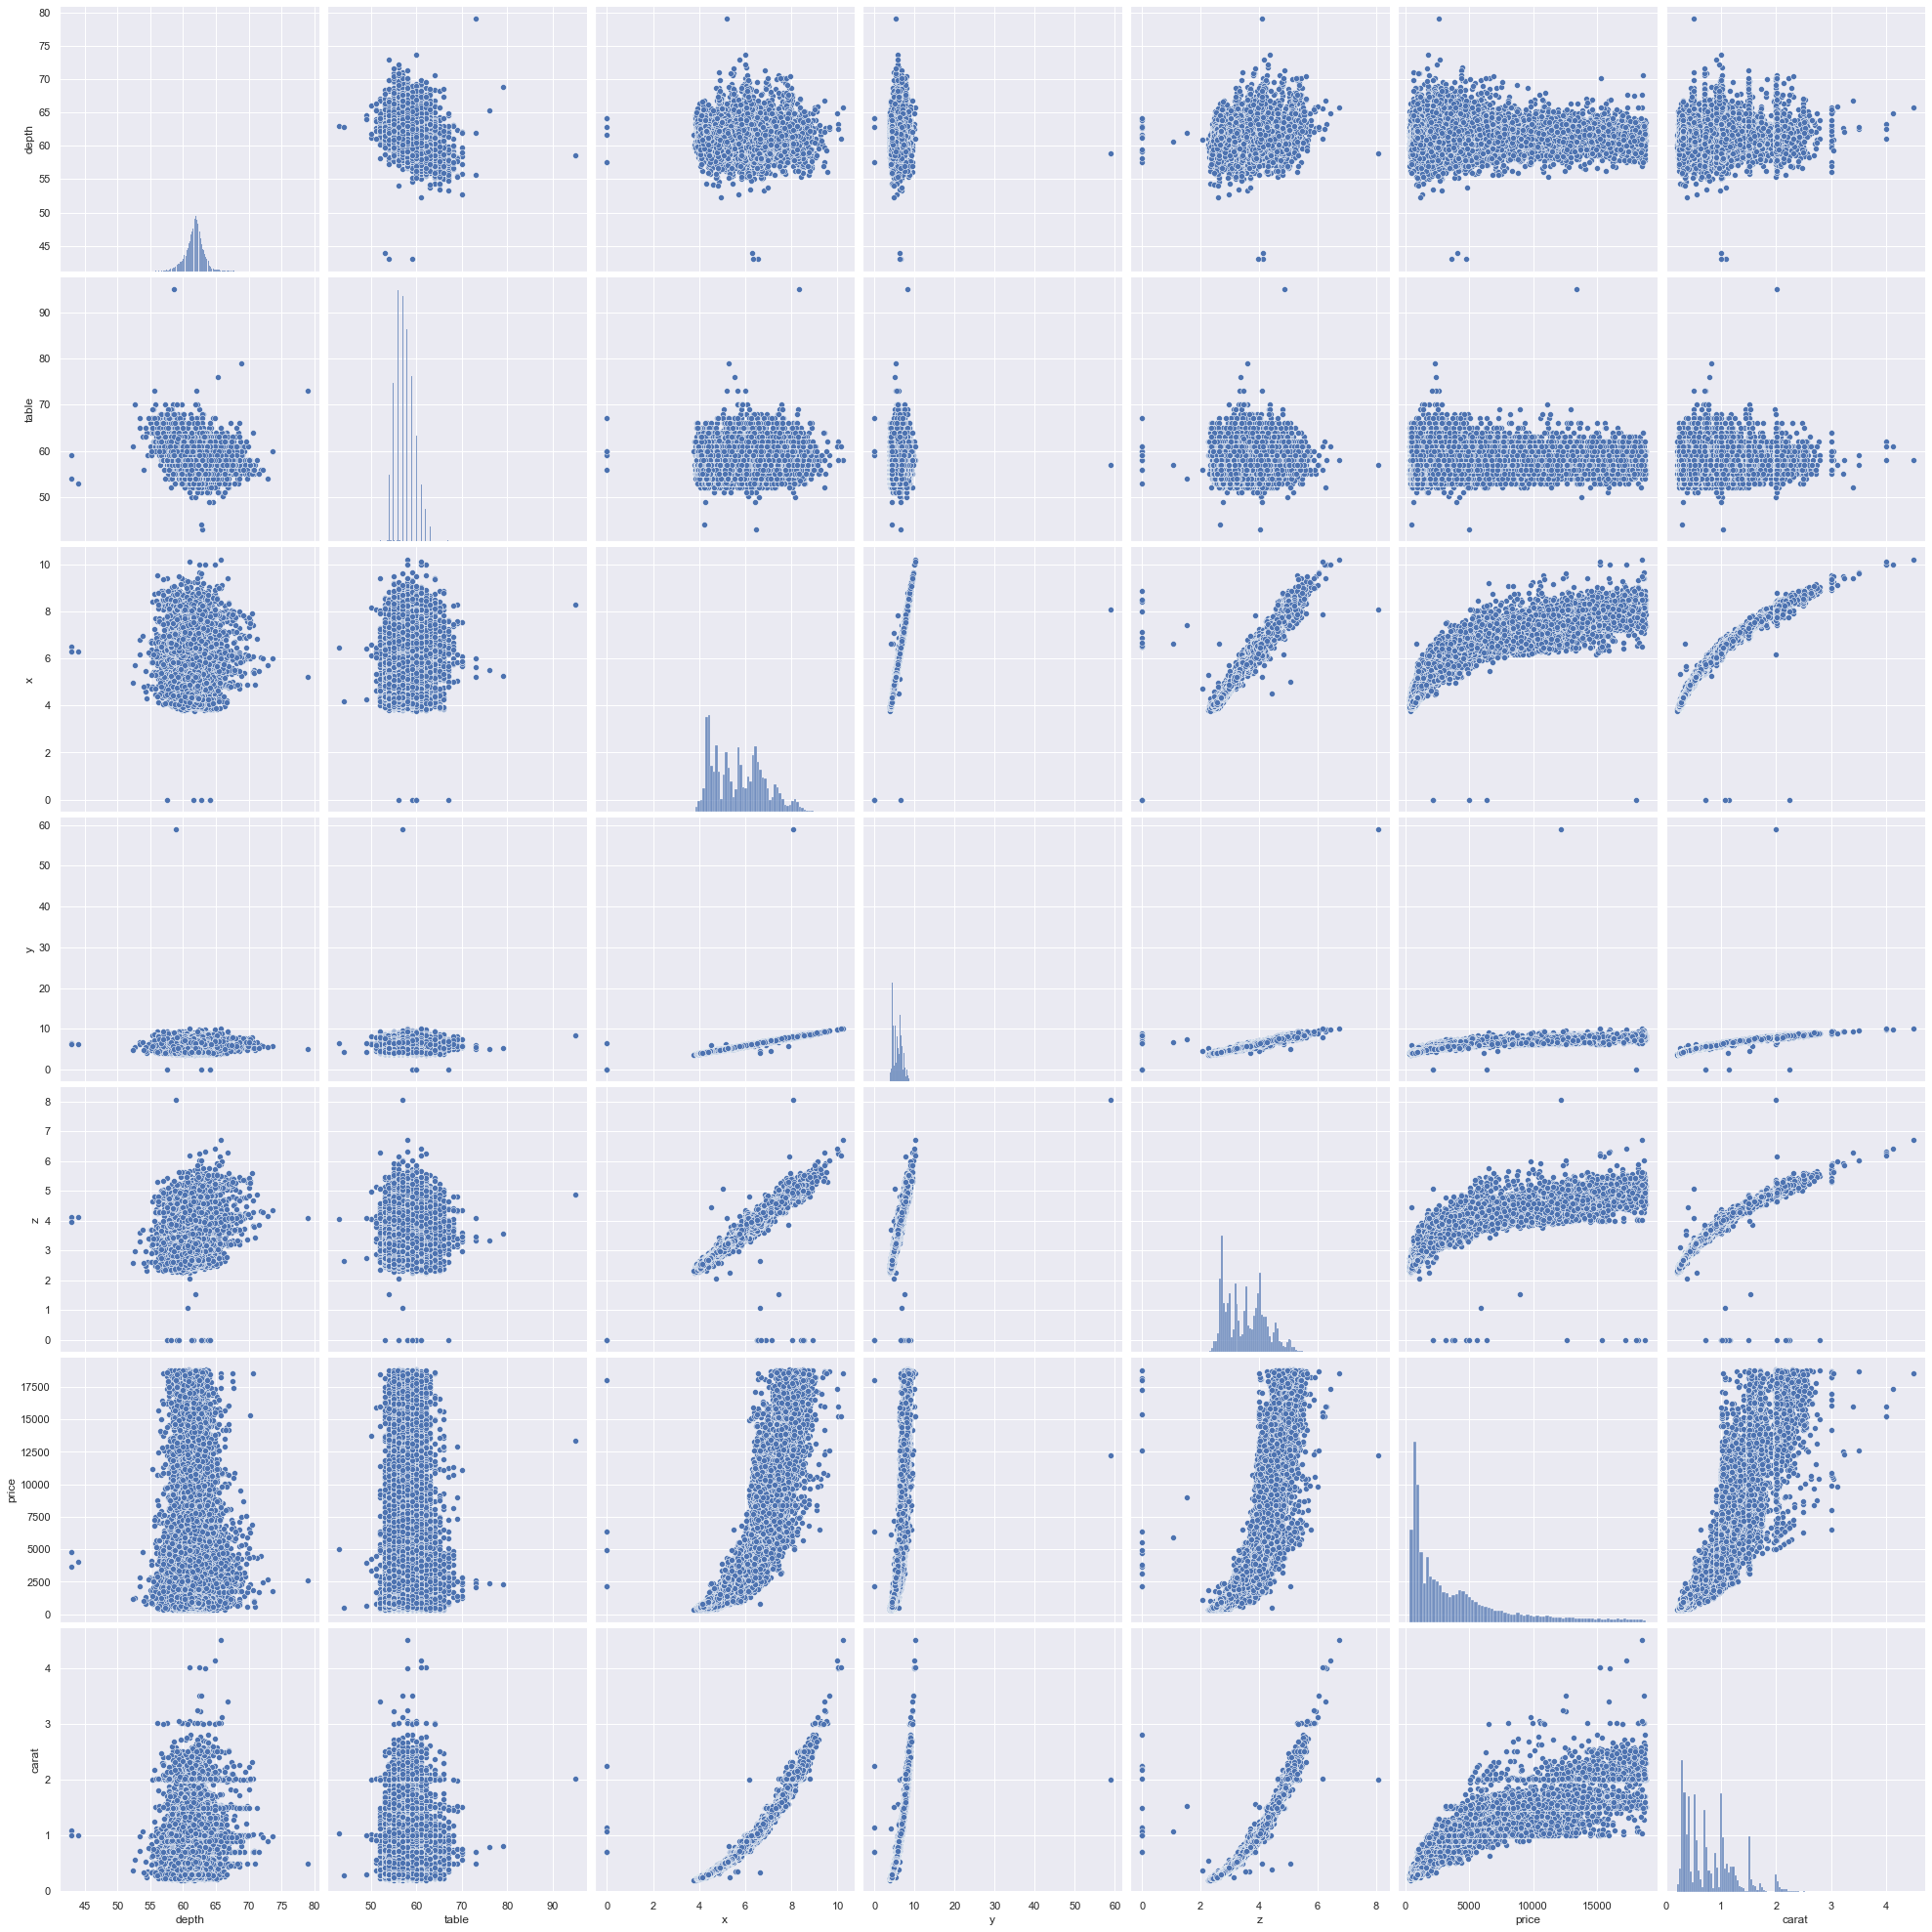

In [28]:
sns.pairplot(df,height=4);

Los outliers claramente son aquellos en los que tenemos valores de x,y,z = 0. Veremos mas adelante si los borramos o los sustituimos.
Tambien hay un outlier de y=60, z>8 y z<2.

[]

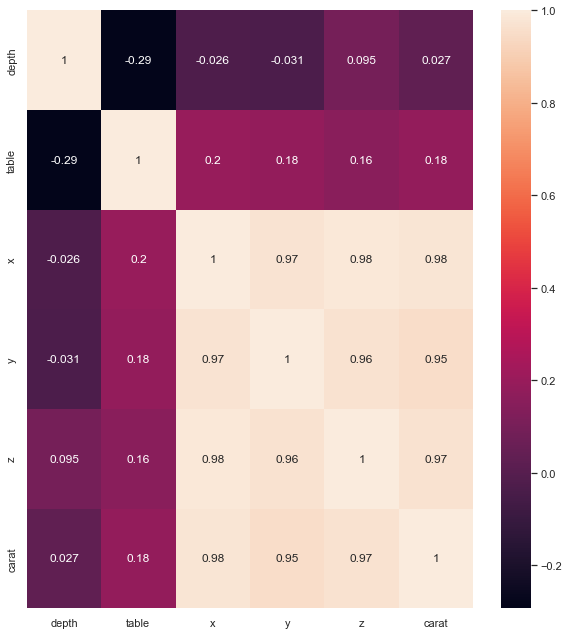

In [32]:
#Let's check the correlation:

plt.figure(figsize=(10,11))
sns.heatmap(df.drop(labels='price',axis=1).corr(),annot=True)
plt.plot()

Vemos una correlación muy muy alta, prácticamente de 1 entre algunos de los features, por lo tanto tocará eliminar alguno de ellos. 